In [129]:
import os, random
import numpy as np
import torch
print(f"Using Pytorch {torch.__version__}")

Using Pytorch 1.7.1+cpu


In [130]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.random.manual_seed(SEED);

In [131]:
x = torch.randn(4,1,4)
x = x.squeeze(1)
x, x.shape

(tensor([[ 1.9269,  1.4873,  0.9007, -2.1055],
         [ 0.6784, -1.2345, -0.0431, -1.6047],
         [-0.7521,  1.6487, -0.3925, -1.4036],
         [-0.7279, -0.5594, -0.7688,  0.7624]]),
 torch.Size([4, 4]))

In [132]:
y = x.unsqueeze(1)
y, y.shape

(tensor([[[ 1.9269,  1.4873,  0.9007, -2.1055]],
 
         [[ 0.6784, -1.2345, -0.0431, -1.6047]],
 
         [[-0.7521,  1.6487, -0.3925, -1.4036]],
 
         [[-0.7279, -0.5594, -0.7688,  0.7624]]]),
 torch.Size([4, 1, 4]))

In [133]:
y2 = y.view(4,1)

RuntimeError: shape '[4, 1]' is invalid for input of size 16

In [134]:
x = torch.tensor([[1,2,3,4], [5,6,7,8]])
y = torch.tensor([2, 3, 1, 0])
print(x@y)  # matmul
print(x@y2)

tensor([11, 35])


NameError: name 'y2' is not defined

In [ ]:
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True)
print(x)
# perform some op
out = x.pow(2).sum()
out.backward()
x.grad

## Building a Neural Network

In this section we'll illustrate the process of building a simple NN on fictitious data.

In [135]:
import os, random
import numpy as np
import torch
print(f"Using Pytorch {torch.__version__}")
import torch.nn as nn
import torch.nn.functional as F

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.random.manual_seed(SEED);

Using Pytorch 1.7.1+cpu


In [136]:
# our fictitious data
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.FloatTensor(x)
Y = torch.FloatTensor(y)
print(X, Y)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]]) tensor([[ 3.],
        [ 7.],
        [11.],
        [15.]])


In [137]:
device = 'gpu' if torch.cuda.is_available() else 'cpu'
print(f"Default device: {device}")

Default device: cpu


In [138]:
X = X.to(device)
Y = Y.to(device)

In [139]:
# our neural network
class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 8)
        self.out = nn.Linear(8, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x
    
model = MyNet()
model = model.to(device)
loss_fn = nn.MSELoss()

Y_pred = model(X)
loss_value = loss_fn(Y_pred, Y)
print(f"Loss: {loss_value.item():.4f}")

Loss: 168.3231


In [140]:
from torch.optim import SGD
optimizer = SGD(model.parameters(), lr=0.001)

In [141]:
# perform one forward/backward pass
optimizer.zero_grad()
Y_pred = model(X)
loss_value = loss_fn(Y_pred, Y)
loss_value.backward()  # backpass
optimizer.step()   # update weights

In [142]:
# now train model
loss_values = []
for i, epoch in enumerate(range(100)):
    optimizer.zero_grad()
    Y_pred = model(X)
    loss_value = loss_fn(Y_pred, Y)
    loss_values.append(loss_value.item())
    loss_value.backward()  # backpass
    optimizer.step()   # update weights
    
    if ((i+1) == 1) or ((i+1) % 10 == 0):
        print(f"epoch: {epoch+1:4d} - loss: {loss_value.item():.3f}")


epoch:    1 - loss: 113.799
epoch:   10 - loss: 1.875
epoch:   20 - loss: 0.025
epoch:   30 - loss: 0.023
epoch:   40 - loss: 0.022
epoch:   50 - loss: 0.021
epoch:   60 - loss: 0.020
epoch:   70 - loss: 0.019
epoch:   80 - loss: 0.018
epoch:   90 - loss: 0.018
epoch:  100 - loss: 0.017


In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn')
sns.set(style='darkgrid', font_scale=1.2)

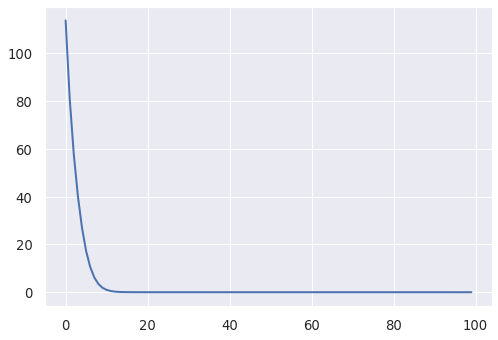

In [144]:
plt.plot(range(100), loss_values, lw=2);

# Using ANN for MNIST Digits Classification

In [126]:
import os, random
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
print(f"Using Tensorflow {tf.__version__}")

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

Using Tensorflow 2.4.1


X_train.shape: (60000, 28, 28) - y_train.shape: (60000,) - X_test.shape: (10000, 28, 28) - y_test.shape: (10000,)
X_train.shape: (42000, 28, 28) - y_train.shape: (42000,) - X_val.shape: (18000, 28, 28) - y_val.shape: (18000,) - X_test.shape: (10000, 28, 28) - y_test.shape: (10000,)


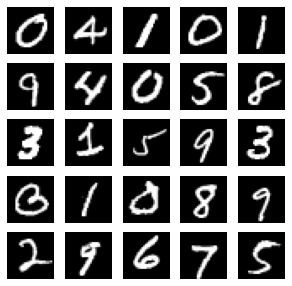

In [127]:
# load mnist dataset & show sample
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"X_train.shape: {X_train.shape} - y_train.shape: {y_train.shape} - " +
      f"X_test.shape: {X_test.shape} - y_test.shape: {y_test.shape}")

# X_train, X_test = X_train/255., X_test/255.

# split X_train/y_train into train/cross-val datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.30, random_state=SEED)
print(f"X_train.shape: {X_train.shape} - y_train.shape: {y_train.shape} - " +
      f"X_val.shape: {X_val.shape} - y_val.shape: {y_val.shape} - " + 
      f"X_test.shape: {X_test.shape} - y_test.shape: {y_test.shape}")

# let's display a sample of 25 images
rand_indexes = np.random.randint(0, X_train.shape[0], 25)
rand_images = X_train[rand_indexes]
rand_labels = y_train[rand_indexes]

plt.figure(figsize=(5,5))
for i in range(len(rand_indexes)):
    plt.subplot(5, 5, i + 1)
    image = rand_images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()
plt.close()

In [128]:
IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS, NUM_CLASSES = X_train.shape[1], X_train.shape[2], 1, 10
print(f"IMAGE_HEIGHT: {IMAGE_HEIGHT} - IMAGE_WIDTH: {IMAGE_WIDTH} - NUM_CHANNELS: {NUM_CHANNELS}")

IMAGE_HEIGHT: 28 - IMAGE_WIDTH: 28 - NUM_CHANNELS: 1


## Using Pytorch ANN for MNIST classification

In [129]:
import os, random
import numpy as np
import torch
print(f"Using Pytorch {torch.__version__}")
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pytorch_toolkit as pytk

SEED = 42
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
torch.random.manual_seed(SEED);

Using Pytorch 1.7.1+cpu


In [132]:
class FMNISTNet(pytk.PytkModule):
    def __init__(self):
        super(FMNISTNet, self).__init__()
        self.fc1 = pytk.Linear(IMAGE_HEIGHT * IMAGE_WIDTH * NUM_CHANNELS, 256)
        self.fc2 = pytk.Linear(256, 256)
        self.out = pytk.Linear(256, NUM_CLASSES)

    def forward(self, x):
        # flatten input (for DNN)
        x = pytk.Flatten(x)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.45, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.45, training=self.training)
        # NOTE: nn.CrossEntropyLoss() includes a logsoftmax call, which applies a softmax
        # function to outputs. So, don't apply one yourself!
        # x = F.softmax(self.out(x), dim=1)  # -- don't do this!
        x = self.out(x)
        return x

In [133]:
pyt_model = FMNISTNet()
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(params=model.parameters(), lr=LR_RATE, momentum=0.8, nesterov=False, weight_decay=L2_REG)
optimizer = optim.Adam(params=pyt_model.parameters(), lr=0.001, weight_decay=0.0001)
pyt_model.compile(loss=criterion, optimizer=optimizer, metrics=['accuracy'])
pyt_model.summary((NUM_CHANNELS,IMAGE_HEIGHT, IMAGE_WIDTH))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
            Linear-2                  [-1, 256]          65,792
            Linear-3                   [-1, 10]           2,570
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 1.03
Estimated Total Size (MB): 1.03
----------------------------------------------------------------


In [134]:
X_train5, X_val5, X_test5 = X_train/255., X_val/255., X_test/255.
y_train5, y_val5, y_test5 = y_train.astype('long'), y_val.astype('long'), y_test.astype('long')
hist = pyt_model.fit(X_train5, y_train5, epochs=20, batch_size=128, validation_data=(X_val5, y_val5))

Training on CPU...
Training on 42000 samples, cross-validating on 18000 samples
Epoch ( 1/20): (42000/42000) -> loss: 0.4970 - accuracy: 0.8469 - val_loss: 0.1801 - val_accuracy: 0.9449 - lr: ['0.00100000']
Epoch ( 2/20): (42000/42000) -> loss: 0.2244 - accuracy: 0.9332 - val_loss: 0.1313 - val_accuracy: 0.9597 - lr: ['0.00100000']
Epoch ( 3/20): (42000/42000) -> loss: 0.1736 - accuracy: 0.9479 - val_loss: 0.1055 - val_accuracy: 0.9680 - lr: ['0.00100000']
Epoch ( 4/20): (42000/42000) -> loss: 0.1427 - accuracy: 0.9568 - val_loss: 0.0973 - val_accuracy: 0.9714 - lr: ['0.00100000']
Epoch ( 5/20): (42000/42000) -> loss: 0.1249 - accuracy: 0.9622 - val_loss: 0.0898 - val_accuracy: 0.9727 - lr: ['0.00100000']
Epoch ( 6/20): (42000/42000) -> loss: 0.1116 - accuracy: 0.9664 - val_loss: 0.0842 - val_accuracy: 0.9744 - lr: ['0.00100000']
Epoch ( 7/20): (42000/42000) -> loss: 0.1066 - accuracy: 0.9663 - val_loss: 0.0857 - val_accuracy: 0.9752 - lr: ['0.00100000']
Epoch ( 8/20): (42000/42000) ->

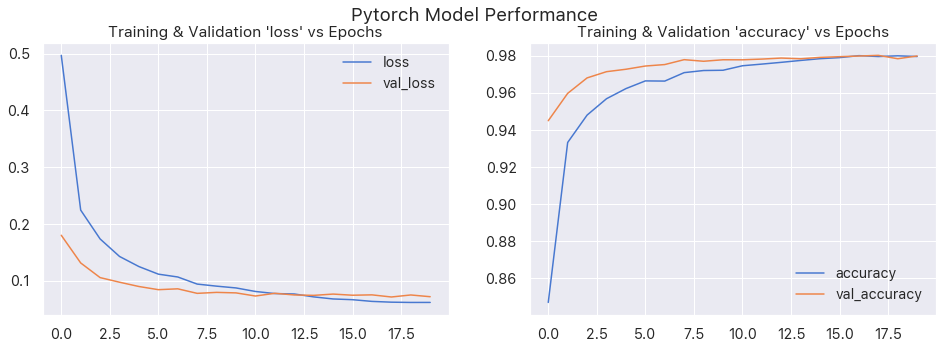

In [135]:
pytk.show_plots(hist, metric='accuracy', plot_title='Pytorch Model Performance')

In [136]:
# evaluate performance on train, cross-val & test data
loss, acc = pyt_model.evaluate_dataset(train_dataset)
print('Training data  -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = pyt_model.evaluate_dataset(val_dataset)
print('Cross-val data -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = pyt_model.evaluate_dataset(test_dataset)
print('Testing data   -> loss: %.3f, acc: %.3f' % (loss, acc))

Evaluating (42000/42000) -> loss: 0.0156 - accuracy: 0.9958
Training data  -> loss: 0.016, acc: 0.996
Evaluating (18000/18000) -> loss: 0.0718 - accuracy: 0.9799
Cross-val data -> loss: 0.072, acc: 0.980
Evaluating (10000/10000) -> loss: 0.0686 - accuracy: 0.9792
Testing data   -> loss: 0.069, acc: 0.979


In [138]:
torch.save(pyt_model.to('cpu').state_dict(), './model_states/pyt_mnist_ann.pth')
del pyt_model

In [139]:
# load from state dict
pyt_model = FMNISTNet()
state_dict = torch.load('./model_states/pyt_mnist_ann.pth')
pyt_model.load_state_dict(state_dict)

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(params=model.parameters(), lr=LR_RATE, momentum=0.8, nesterov=False, weight_decay=L2_REG)
optimizer = optim.Adam(params=pyt_model.parameters(), lr=0.001, weight_decay=0.0001)
pyt_model.compile(loss=criterion, optimizer=optimizer, metrics=['accuracy'])
pyt_model.summary((NUM_CHANNELS,IMAGE_HEIGHT, IMAGE_WIDTH))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
            Linear-2                  [-1, 256]          65,792
            Linear-3                   [-1, 10]           2,570
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 1.03
Estimated Total Size (MB): 1.03
----------------------------------------------------------------


In [140]:
y_pred_probs, y_pred_labels = pyt_model.predict_dataset(test_dataset)

random_indexes = np.random.randint(0, X_test.shape[0], 25)
y_test_rand = y_test[random_indexes]
y_pred_rand = y_pred_labels[random_indexes]
print(f"y_test (25 samples): {y_test_rand}")
print(f"y_pred (25 samples): {y_pred_rand}")
print(f"I got {len(y_test[y_test == y_pred_labels])} of {len(y_test)} correct")

y_test (25 samples): [1 6 2 4 3 4 8 9 8 9 6 6 2 2 9 0 9 2 9 9 4 1 1 5 3]
y_pred (25 samples): [1 6 2 4 3 4 8 9 8 9 6 6 2 2 9 0 9 2 9 9 4 1 1 5 3]
I got 10000 of 10000 correct


In [141]:
del pyt_model

### Training Pytorch model using `torch.utils.data.Dataset`

In [142]:
# load from state dict
pyt_model = FMNISTNet()

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(params=model.parameters(), lr=LR_RATE, momentum=0.8, nesterov=False, weight_decay=L2_REG)
optimizer = optim.Adam(params=pyt_model.parameters(), lr=0.001, weight_decay=0.0001)
pyt_model.compile(loss=criterion, optimizer=optimizer, metrics=['accuracy'])
pyt_model.summary((NUM_CHANNELS,IMAGE_HEIGHT, IMAGE_WIDTH))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
            Linear-2                  [-1, 256]          65,792
            Linear-3                   [-1, 10]           2,570
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 1.03
Estimated Total Size (MB): 1.03
----------------------------------------------------------------


In [143]:
# define a dataset for Pytorch
from torch.utils.data import Dataset
from torchvision import transforms

class MNISTDataset(Dataset):
    def __init__(self, x, y, transforms=None):
        self.x = x
        self.y = torch.LongTensor(y)
        self.transforms = transforms

    def __len__(self):
        return len(self.x)

    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        if self.transforms is not None:
            x = self.transforms(x)
        return x, y

image_transforms = transforms.Compose([
    transforms.ToTensor()   
])

In [144]:
train_dataset = MNISTDataset(X_train, y_train, image_transforms)
val_dataset = MNISTDataset(X_val, y_val, image_transforms)
test_dataset = MNISTDataset(X_test, y_test, image_transforms)

In [145]:
hist = pyt_model.fit_dataset(train_dataset, epochs=20, batch_size=128, validation_dataset=val_dataset)

Training on CPU...
Training on 42000 samples, cross-validating on 18000 samples
Epoch ( 1/20): (42000/42000) -> loss: 0.5052 - accuracy: 0.8414 - val_loss: 0.1930 - val_accuracy: 0.9400 - lr: ['0.00100000']
Epoch ( 2/20): (42000/42000) -> loss: 0.2287 - accuracy: 0.9315 - val_loss: 0.1287 - val_accuracy: 0.9617 - lr: ['0.00100000']
Epoch ( 3/20): (42000/42000) -> loss: 0.1772 - accuracy: 0.9475 - val_loss: 0.1141 - val_accuracy: 0.9644 - lr: ['0.00100000']
Epoch ( 4/20): (42000/42000) -> loss: 0.1471 - accuracy: 0.9558 - val_loss: 0.1020 - val_accuracy: 0.9688 - lr: ['0.00100000']
Epoch ( 5/20): (42000/42000) -> loss: 0.1321 - accuracy: 0.9601 - val_loss: 0.0910 - val_accuracy: 0.9726 - lr: ['0.00100000']
Epoch ( 6/20): (42000/42000) -> loss: 0.1135 - accuracy: 0.9651 - val_loss: 0.0889 - val_accuracy: 0.9723 - lr: ['0.00100000']
Epoch ( 7/20): (42000/42000) -> loss: 0.1060 - accuracy: 0.9676 - val_loss: 0.0824 - val_accuracy: 0.9755 - lr: ['0.00100000']
Epoch ( 8/20): (42000/42000) ->

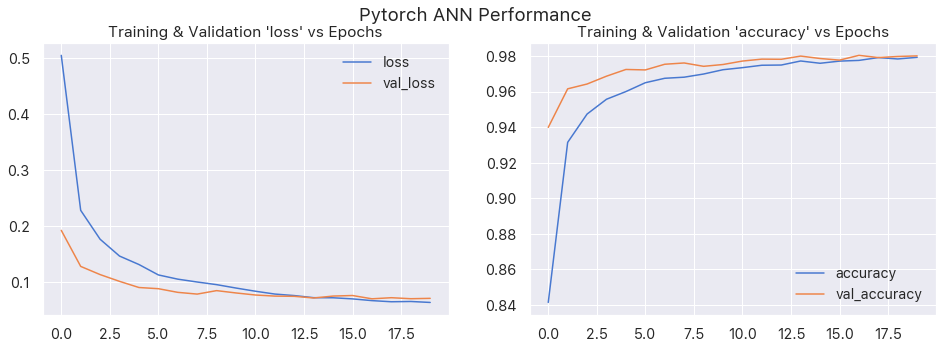

In [146]:
pytk.show_plots(hist, metric='accuracy', plot_title='Pytorch ANN Performance')

In [147]:
# evaluate performance on train, cross-val & test data
loss, acc = pyt_model.evaluate_dataset(train_dataset)
print('Training data  -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = pyt_model.evaluate_dataset(val_dataset)
print('Cross-val data -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = pyt_model.evaluate_dataset(test_dataset)
print('Testing data   -> loss: %.3f, acc: %.3f' % (loss, acc))

Evaluating (42000/42000) -> loss: 0.0167 - accuracy: 0.9954
Training data  -> loss: 0.017, acc: 0.995
Evaluating (18000/18000) -> loss: 0.0717 - accuracy: 0.9802
Cross-val data -> loss: 0.072, acc: 0.980
Evaluating (10000/10000) -> loss: 0.0701 - accuracy: 0.9776
Testing data   -> loss: 0.070, acc: 0.978


**Observations:**

>Configuration | Training Acc (%) | Cross-Val Acc (%) | Testing Acc (%) 
>:---|:---:|:---:|:---:|
>**Pytorch ANN (with datasets)**| 99.4|97.92|97.9|

* From the loss & accuracy plots, we see that the model is slightly overfitting our data - there is a ~1% difference between train & test accuracies
* Cross-validation & test accuracies are almost the same - this should be expected as samples were drawn from the same _population_ (viz. the test dataset). **With more epochs, we get but a slight improvement in performance**

In [148]:
# pyt_model.save('./model_states/pyt_mnist_ann.pyt')
# del pyt_model

torch.save(pyt_model.to('cpu').state_dict(), './model_states/pyt_mnist_ann_ds.pth')
del pyt_model

In [149]:
# load from saved state
pyt_model = FMNISTNet()
state_dict = torch.load('./model_states/pyt_mnist_ann_ds.pth')
pyt_model.load_state_dict(state_dict)

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(params=model.parameters(), lr=LR_RATE, momentum=0.8, nesterov=False, weight_decay=L2_REG)
optimizer = optim.Adam(params=pyt_model.parameters(), lr=0.001, weight_decay=0.0001)
pyt_model.compile(loss=criterion, optimizer=optimizer, metrics=['accuracy'])
pyt_model.summary((NUM_CHANNELS,IMAGE_HEIGHT, IMAGE_WIDTH))
print(pyt_model.summary((NUM_CHANNELS, IMAGE_HEIGHT, IMAGE_WIDTH)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
            Linear-2                  [-1, 256]          65,792
            Linear-3                   [-1, 10]           2,570
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 1.03
Estimated Total Size (MB): 1.03
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
            Linear-2                  [-1, 256]          65,792
            Linear-3                   [-1, 10]           2,570
Total params: 269,322
Trainable params: 2

In [150]:
y_pred_probs, y_pred_labels = pyt_model.predict_dataset(test_dataset)

random_indexes = np.random.randint(0, X_test.shape[0], 25)
y_test_rand = y_test[random_indexes]
y_pred_rand = y_pred_labels[random_indexes]
print(f"y_test (25 samples): {y_test_rand}")
print(f"y_pred (25 samples): {y_pred_rand}")
print(f"I got {len(y_test[y_test == y_pred_labels])} of {len(y_test)} correct")


y_test (25 samples): [6 0 0 5 1 1 9 7 8 7 8 1 5 5 2 4 6 6 7 1 7 6 9 1 8]
y_pred (25 samples): [6 0 0 5 1 1 9 7 8 7 8 1 5 5 2 4 6 6 7 1 7 6 9 1 8]
I got 10000 of 10000 correct


In [151]:
del pyt_model

## Using Tensorflow/Keras ANN for MNIST classification

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.regularizers import l2

In [117]:
input_shape = IMAGE_HEIGHT * IMAGE_WIDTH
X_train2, X_val2, X_test2 = X_train/255., X_val/255., X_test/255.
X_train2 = np.reshape(X_train2, [-1, input_shape])
X_val2 = np.reshape(X_val2, [-1, input_shape])
X_test2 = np.reshape(X_test2, [-1, input_shape])
y_train2, y_val2, y_test2 = y_train.astype('long'), y_val.astype('long'), y_test.astype('long')

In [118]:
l2_reg = l2(0.0001)
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2_reg, input_dim=input_shape),
    Dropout(0.45),
    Dense(256, kernel_regularizer=l2_reg, activation='relu'),
    Dropout(0.45),
    Dense(10, kernel_regularizer=l2_reg, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


In [120]:
hist = model.fit(X_train2, y_train2, epochs=20, batch_size=128, validation_data=(X_val2, y_val2))

Epoch 1/20
329/329 [==============================] - 10s 23ms/step - loss: 0.9115 - accuracy: 0.7259 - val_loss: 0.2442 - val_accuracy: 0.9436
Epoch 2/20
329/329 [==============================] - 7s 22ms/step - loss: 0.3014 - accuracy: 0.9257 - val_loss: 0.2009 - val_accuracy: 0.9568
Epoch 3/20
329/329 [==============================] - 6s 19ms/step - loss: 0.2488 - accuracy: 0.9435 - val_loss: 0.1823 - val_accuracy: 0.9628
Epoch 4/20
329/329 [==============================] - 6s 19ms/step - loss: 0.2107 - accuracy: 0.9539 - val_loss: 0.1611 - val_accuracy: 0.9710
Epoch 5/20
329/329 [==============================] - 7s 21ms/step - loss: 0.1980 - accuracy: 0.9608 - val_loss: 0.1599 - val_accuracy: 0.9712
Epoch 6/20
329/329 [==============================] - 7s 22ms/step - loss: 0.1824 - accuracy: 0.9633 - val_loss: 0.1538 - val_accuracy: 0.9736
Epoch 7/20
329/329 [==============================] - 8s 23ms/step - loss: 0.1802 - accuracy: 0.9650 - val_loss: 0.1467 - val_accuracy: 0.975

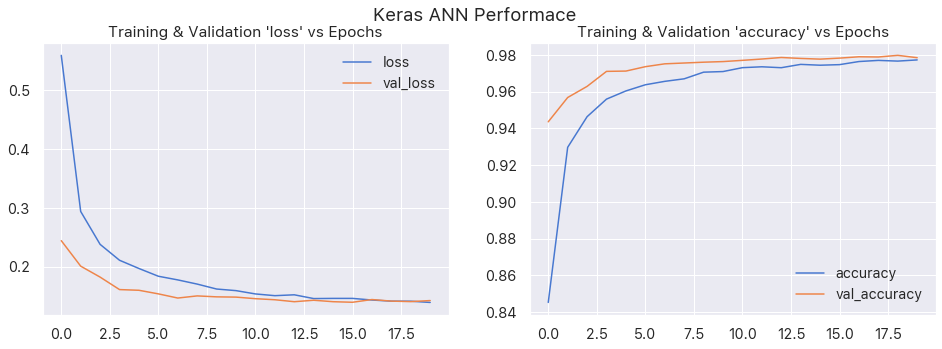

In [122]:
pytk.show_plots(hist.history, metric='accuracy', plot_title="Keras ANN Performace")

In [123]:
# evaluate
loss, acc = model.evaluate(X_train2, y_train2)
print(f"Training  -> loss: {loss:.4f} - acc: {acc:.4f}")
loss, acc = model.evaluate(X_val2, y_val2)
print(f"Cross-val -> loss: {loss:.4f} - acc: {acc:.4f}")
loss, acc = model.evaluate(X_test2, y_test)
print(f"Testing   -> loss: {loss:.4f} - acc: {acc:.4f}")

1313/1313 [==============================] - 6s 5ms/step - loss: 0.0922 - accuracy: 0.9936
Training  -> loss: 0.0922 - acc: 0.9936
563/563 [==============================] - 3s 5ms/step - loss: 0.1424 - accuracy: 0.9784
Cross-val -> loss: 0.1424 - acc: 0.9784
313/313 [==============================] - 2s 5ms/step - loss: 0.1369 - accuracy: 0.9799
Testing   -> loss: 0.1369 - acc: 0.9799


In [124]:
# run predictions
y_pred = np.argmax(model.predict(X_test2), axis=1)
random_indexes = np.random.randint(0, X_test2.shape[0], 25)
y_test_rand = y_test[random_indexes]
y_pred_rand = y_pred[random_indexes]
print(f"y_test (25 samples): {y_test_rand}")
print(f"y_pred (25 samples): {y_pred_rand}")
print(f"I got {len(y_test[y_test == y_pred])} of {len(y_test)} correct")

y_test (25 samples): [4 8 5 0 1 3 5 3 8 6 6 7 9 0 0 1 7 0 1 5 3 8 3 4 3]
y_pred (25 samples): [4 8 5 0 1 3 5 3 8 6 6 7 9 0 0 1 7 0 1 5 3 8 3 4 3]
I got 9799 of 10000 correct


### Using a CNN with Tensorflow

In [155]:
X_train3 = np.expand_dims(X_train, axis=3)
X_test3 = np.expand_dims(X_test, axis=3)
print(f"X_train.shape: {X_train3.shape} - y_train.shape: {y_train.shape} - " +
      f"X_test.shape: {X_test3.shape} - y_test.shape: {y_test.shape}")

X_train.shape: (60000, 28, 28, 1) - y_train.shape: (60000,) - X_test.shape: (10000, 28, 28, 1) - y_test.shape: (10000,)


In [156]:
(X_train3.shape[1], X_train3.shape[2],1)

(28, 28, 1)

In [157]:
l2_reg = l2(0.0001)
cnn_model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2_reg, 
           input_shape=(X_train3.shape[1], X_train3.shape[2],1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2_reg),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2_reg),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn_model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [158]:
hist = cnn_model.fit(X_train3, y_train, epochs=20, batch_size=128, validation_split=0.20)

Epoch 1/20
375/375 [==============================] - 74s 194ms/step - loss: 0.8578 - accuracy: 0.7337 - val_loss: 0.1418 - val_accuracy: 0.9641
Epoch 2/20
375/375 [==============================] - 67s 178ms/step - loss: 0.1702 - accuracy: 0.9552 - val_loss: 0.1088 - val_accuracy: 0.9744
Epoch 3/20
375/375 [==============================] - 68s 181ms/step - loss: 0.1324 - accuracy: 0.9676 - val_loss: 0.0941 - val_accuracy: 0.9798
Epoch 4/20
375/375 [==============================] - 67s 178ms/step - loss: 0.1143 - accuracy: 0.9719 - val_loss: 0.0983 - val_accuracy: 0.9782
Epoch 5/20
375/375 [==============================] - 69s 183ms/step - loss: 0.1006 - accuracy: 0.9761 - val_loss: 0.0850 - val_accuracy: 0.9832
Epoch 6/20
375/375 [==============================] - 67s 179ms/step - loss: 0.0936 - accuracy: 0.9788 - val_loss: 0.0839 - val_accuracy: 0.9839
Epoch 7/20
375/375 [==============================] - 85s 226ms/step - loss: 0.0847 - accuracy: 0.9823 - val_loss: 0.0907 - val_ac

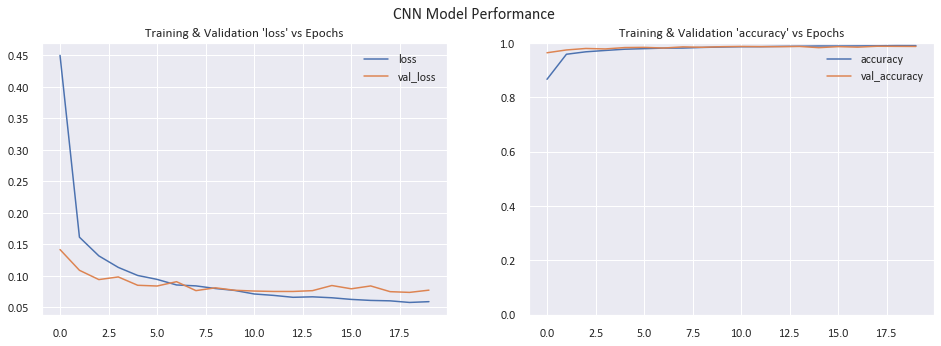

In [159]:
show_plots(hist.history, metric='accuracy', plot_title='CNN Model Performance')

In [160]:
# evaluate
loss, acc = cnn_model.evaluate(X_train3, y_train)
print(f"Training -> loss: {loss:.4f} - acc: {acc:.4f}")
loss, acc = cnn_model.evaluate(X_test3, y_test)
print(f"Testing  -> loss: {loss:.4f} - acc: {acc:.4f}")

1875/1875 [==============================] - 29s 15ms/step - loss: 0.0491 - accuracy: 0.9940
Training -> loss: 0.0491 - acc: 0.9940
313/313 [==============================] - 6s 19ms/step - loss: 0.0714 - accuracy: 0.9880
Testing  -> loss: 0.0714 - acc: 0.9880


In [161]:
# run predictions
y_pred = np.argmax(cnn_model.predict(X_test3), axis=1)
random_indexes = np.random.randint(0, X_test3.shape[0], 25)
y_test_rand = y_test[random_indexes]
y_pred_rand = y_pred[random_indexes]
print(f"y_test (25 samples): {y_test_rand}")
print(f"y_pred (25 samples): {y_pred_rand}")
print(f"I got {len(y_test == y_pred)} of {len(y_test)} correct")

y_test (25 samples): [7 1 7 6 9 1 8 3 2 3 1 2 3 0 1 7 1 0 9 3 8 6 7 2 4]
y_pred (25 samples): [7 1 7 6 9 1 8 3 2 3 1 2 3 0 1 7 1 0 7 3 8 6 7 2 4]
I got 10000 of 10000 correct
